In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
data = pd.DataFrame({
    "Vibração":[3.2, 4.0, 3.7, 5.5, 6.2, 2.1, 2.8, 1.9, 7.3, 6.8, 2.4, 5.9, 4.5, 
                2.6, 4.8, 3.4, 6.1, 2.0, 5.0, 7.0],
    "Corrente":[12.5, 14.2, 11.8, 15.6, 17.0, 10.2, 9.5, 8.8, 18.4, 17.8, 10.8, 16.2, 
                13.4, 9.9, 13.9, 11.5, 16.7, 8.6, 14.8, 18.0],
    "Temperatura":[50.0, 51.2, 48.5, 53.1, 56.8, 45.7, 43.2, 41.6, 59.3, 57.9, 46.9, 54.7, 49.7, 44.5, 
                   50.8, 47.3, 55.4, 41.0, 52.3, 58.7],
    "Classe":['Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa']})

In [4]:
# Separando as características e o rótulo
X = data[['Vibração', 'Corrente', 'Temperatura']]
y = data['Classe']

In [5]:
#Dividindo a base de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [18]:
modelo = SVC(kernel= 'linear') # crio o modelo SVC
modelo.fit(X_train,y_train) # treino o modelo

SVC(kernel='linear')

In [19]:
y_pred = modelo.predict(X_test)

In [10]:
X_test

,Vibração,Corrente,Temperatura
0,3.2,12.5,50.0
17,2.0,8.6,41.0
15,3.4,11.5,47.3
1,4.0,14.2,51.2
8,7.3,18.4,59.3
5,2.1,10.2,45.7


In [ ]:
data.head()

In [21]:
#Calculo das métricas do algoritmo de Machine Learning
#Classification Report
acc = accuracy_score(y_pred,y_test)
acuracy = accuracy_score(y_pred,y_test)
print(acuracy)

1.0


In [22]:
#Matriz de Confusão
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[2 0]
 [0 4]]


Text(50.72222222222221, 0.5, 'Real')

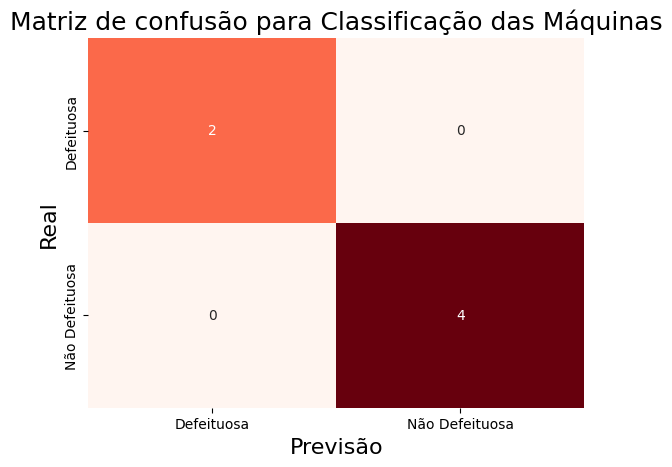

In [25]:
#Vizualizando a matriz de confusão de forma gráfica
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Defeituosa', 'Não Defeituosa'], 
            yticklabels=['Defeituosa','Não Defeituosa'])    
                         
plt.title('Matriz de confusão para Classificação das Máquinas',fontsize=18)     
plt.xlabel('Previsão', fontsize=16)
plt.ylabel('Real',fontsize=16)  

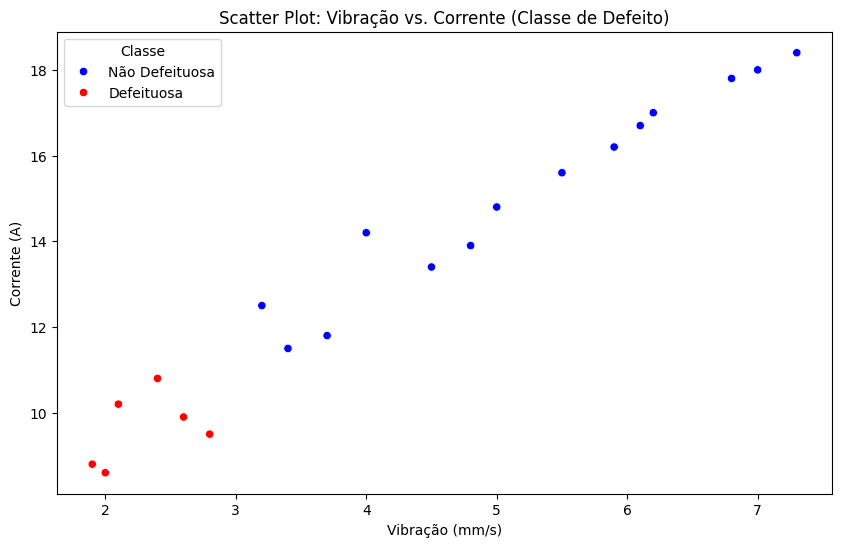

In [26]:
#Mapeando as cores com base na classe
palette = {"Defeituosa": "red", "Não Defeituosa": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vibração', y='Corrente', hue='Classe', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Vibração vs. Corrente (Classe de Defeito)')
plt.xlabel('Vibração (mm/s)')
plt.ylabel('Corrente (A)')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()